In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer

sid = SentimentIntensityAnalyzer()
lemma = WordNetLemmatizer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\chris\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
def get_sentiment(filepath):
    df = pd.read_csv(filepath)
    
    df["full_text"] = df["title"] + " " + df["selftext"]
    df["sent_score"] = df["full_text"].apply(lambda review: sid.polarity_scores(review))
    df["compound"] = df["sent_score"].apply(lambda score_dict: score_dict["compound"])
    df["sentiment"] = df["compound"].apply(lambda c: "pos" if c > 0 else ("neu" if c == 0 else "neg"))
    
    return df

In [3]:
fsu = get_sentiment("data/public/FSU/FSU_all_time.csv")
gatech = get_sentiment("data/public/gatech/gatech_all_time.csv")
pennstate = get_sentiment("data/public/PennStateUniversity/PennStateUniversity_all_time.csv")
ucdavis = get_sentiment("data/public/UCDavis/UCDavis_all_time.csv")
uci = get_sentiment("data/public/UCI/UCI_all_time.csv")
ucla = get_sentiment("data/public/ucla/ucla_all_time.csv")
ucsantabarbara = get_sentiment("data/public/UCSantaBarbara/UCSantaBarbara_all_time.csv")
ucsc = get_sentiment("data/public/UCSC/UCSC_all_time.csv")
ucsd = get_sentiment("data/public/UCSD/UCSD_all_time.csv")
udub = get_sentiment("data/public/udub/udub_all_time.csv")
uofm = get_sentiment("data/public/uofm/uofm_all_time.csv")
utaustin = get_sentiment("data/public/UTAustin/UTAustin_all_time.csv")

In [4]:
def countplot_per_year_per_uni(uni, uni_data):
    data = uni_data.copy()
    
    fig, ax = plt.subplots(figsize=(10,5))          # you can change the size here
    fig.suptitle(uni)

    data.created_utc = pd.to_datetime(data['created_utc'], format='%Y-%m-%d %H:%M:%S')
    data.created_utc = data.created_utc.dt.strftime('%Y')
    sns.countplot(x = 'created_utc', hue = 'sentiment', data = data, ax=ax)
    ax.set_xlabel('Year')

def countplot_per_month_per_year_per_uni(uni, uni_data):
    data = uni_data.copy()

    data.created_utc = pd.to_datetime(data['created_utc'], format='%Y-%m-%d %H:%M:%S')
    groups = data.groupby(by=data.created_utc.dt.year)[['created_utc', 'sentiment']]

    fig, ax = plt.subplots(5, figsize=(15,15))      # you can change the size here
    fig.suptitle(uni + '\n')

    for i, (year, df) in enumerate(groups):
        df.created_utc = df.created_utc.dt.strftime('%B')
        sns.countplot(x = 'created_utc', hue = 'sentiment', data = df, ax=ax[i])
        ax[i].set_title(year)
        ax[i].set_xlabel('')

    plt.tight_layout()

def pieplot_per_uni(uni, uni_df):
    fig, ax = plt.subplots(figsize=(7,7))           # you can change the size here
    fig.suptitle(uni)
    pd.DataFrame(data=uni_df.sentiment.value_counts()).plot.pie(y='sentiment', ax=ax)

def pieplot_per_year_per_uni(uni, uni_df):
    data = uni_df.copy()

    data.created_utc = pd.to_datetime(data['created_utc'], format='%Y-%m-%d %H:%M:%S')
    groups = data.groupby(by=data.created_utc.dt.year)[['created_utc', 'sentiment']]

    fig, ax = plt.subplots(ncols=5, figsize=(15,15)) # you can change the size here
    fig.suptitle(uni)

    for i, (year, df) in enumerate(groups):
        pd.DataFrame(data=df.sentiment.value_counts()).plot.pie(y='sentiment', ax=ax[i])
        ax[i].set_title(year)

    plt.tight_layout()
    fig.subplots_adjust(top=1.7)                    # adjust this for position of figure title

# $$PUBLIC$$

## $$FSU$$

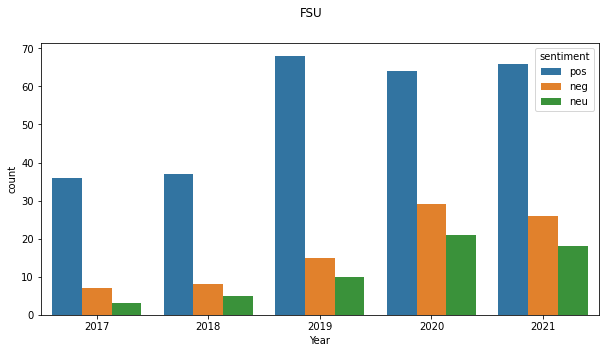

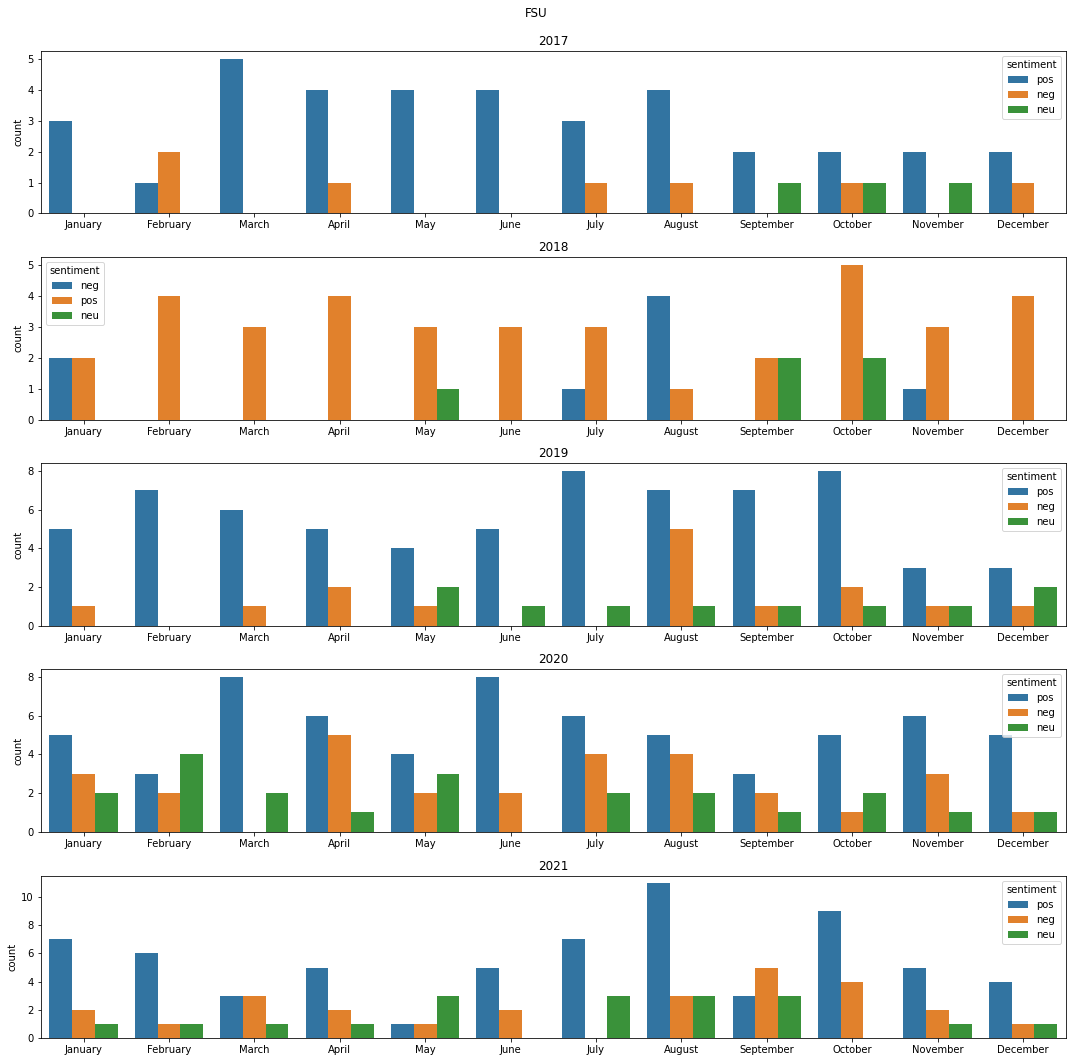

In [5]:
countplot_per_year_per_uni('FSU', fsu)
countplot_per_month_per_year_per_uni('FSU', fsu)

## $$GATECH$$

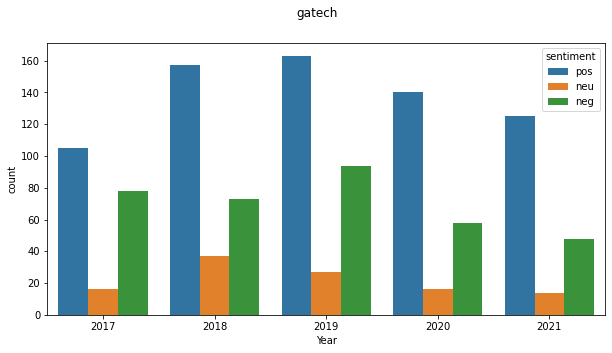

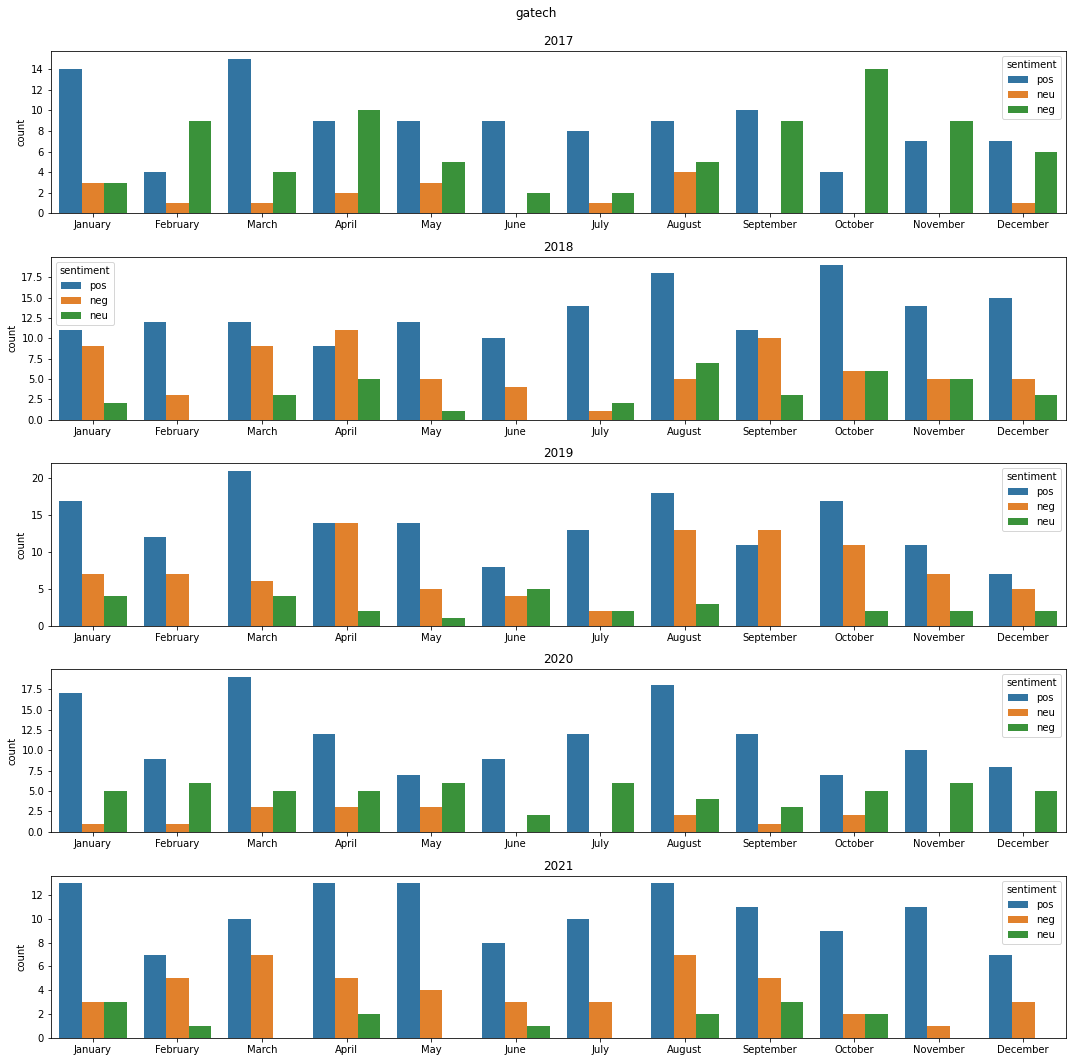

In [6]:
countplot_per_year_per_uni('gatech', gatech)
countplot_per_month_per_year_per_uni('gatech', gatech)

## $$PENNSTATE$$

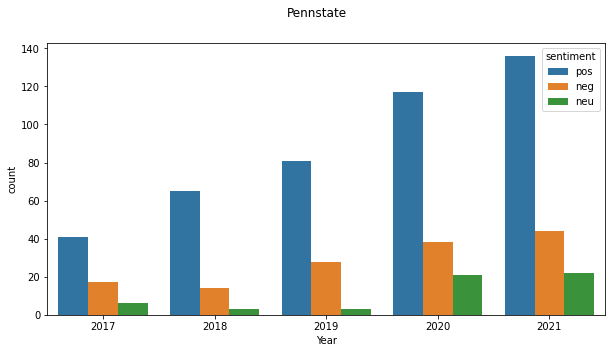

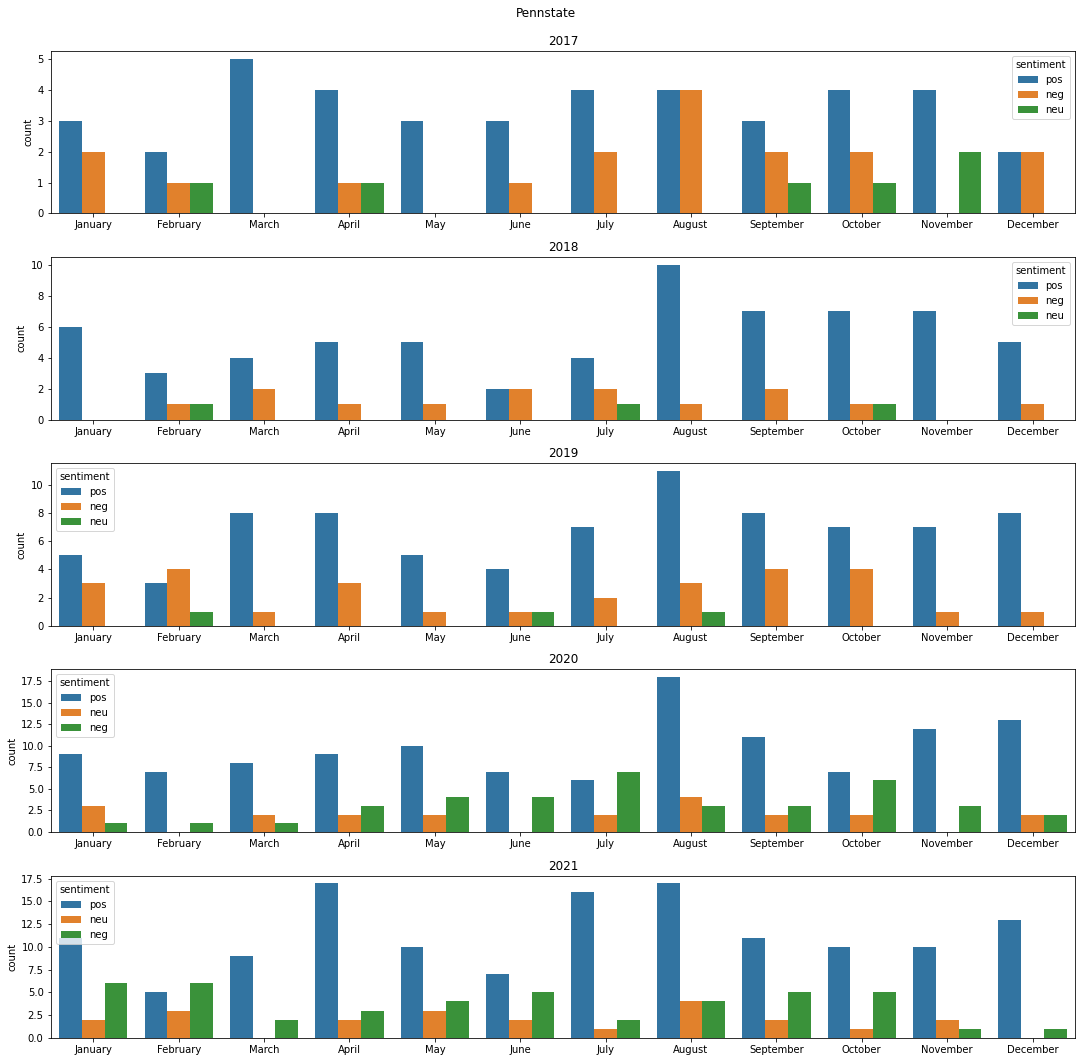

In [7]:
countplot_per_year_per_uni('Pennstate', pennstate)
countplot_per_month_per_year_per_uni('Pennstate', pennstate)

## $$UCDAVIS$$

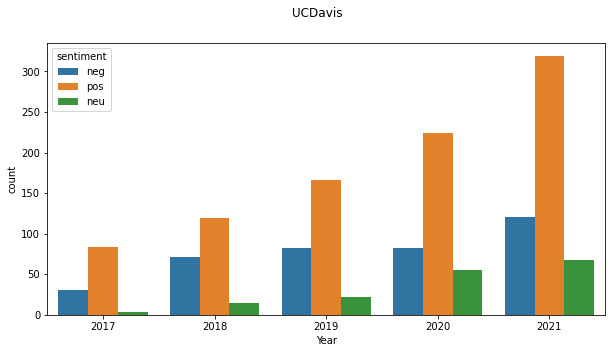

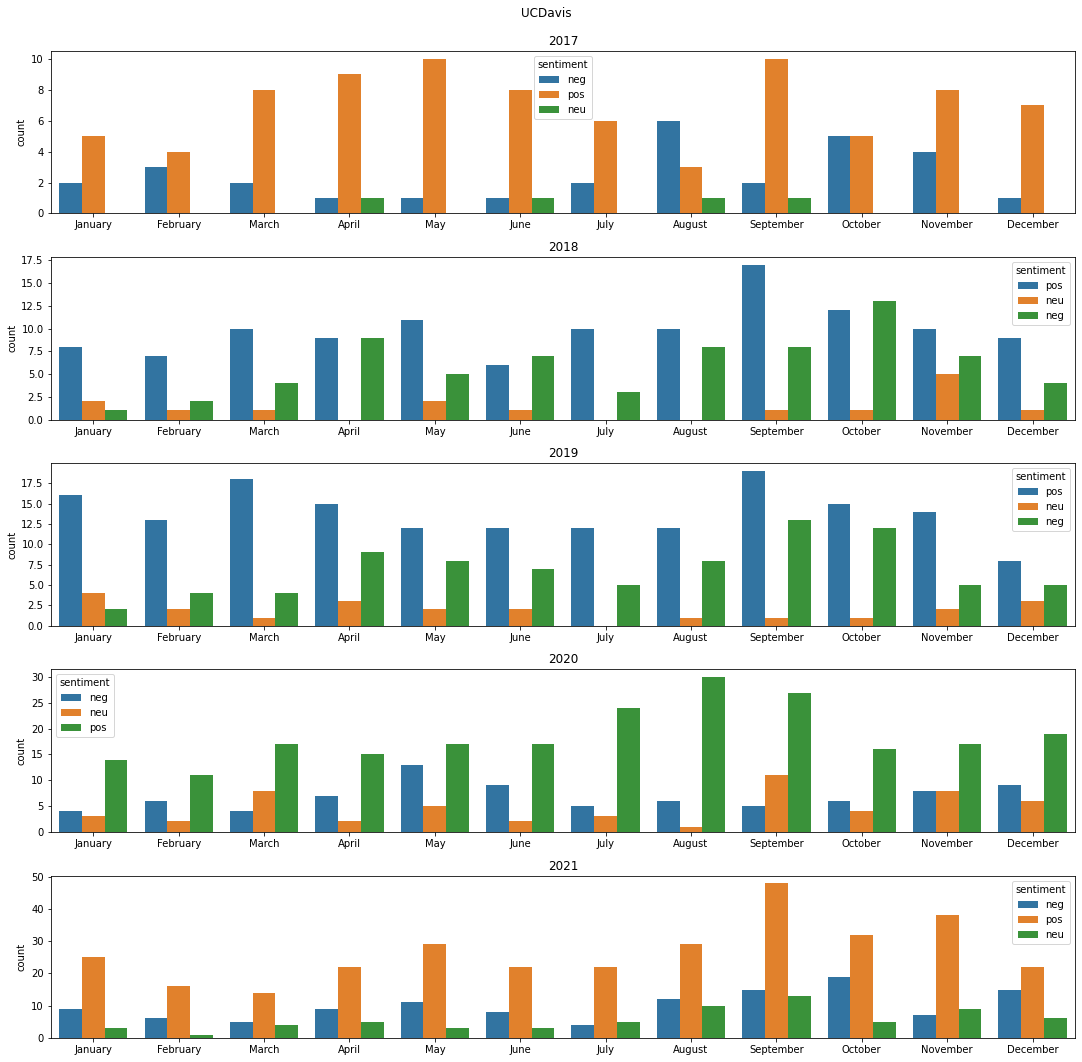

In [8]:
countplot_per_year_per_uni('UCDavis', ucdavis)
countplot_per_month_per_year_per_uni('UCDavis', ucdavis)

## $$UCI$$

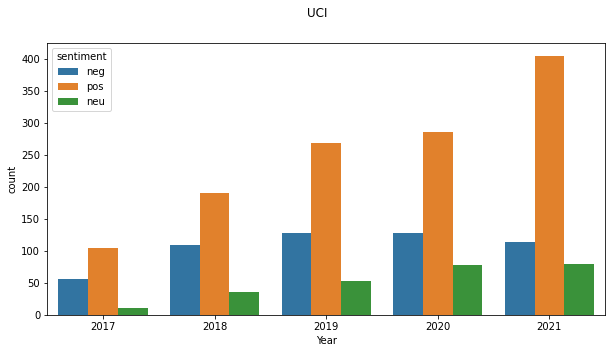

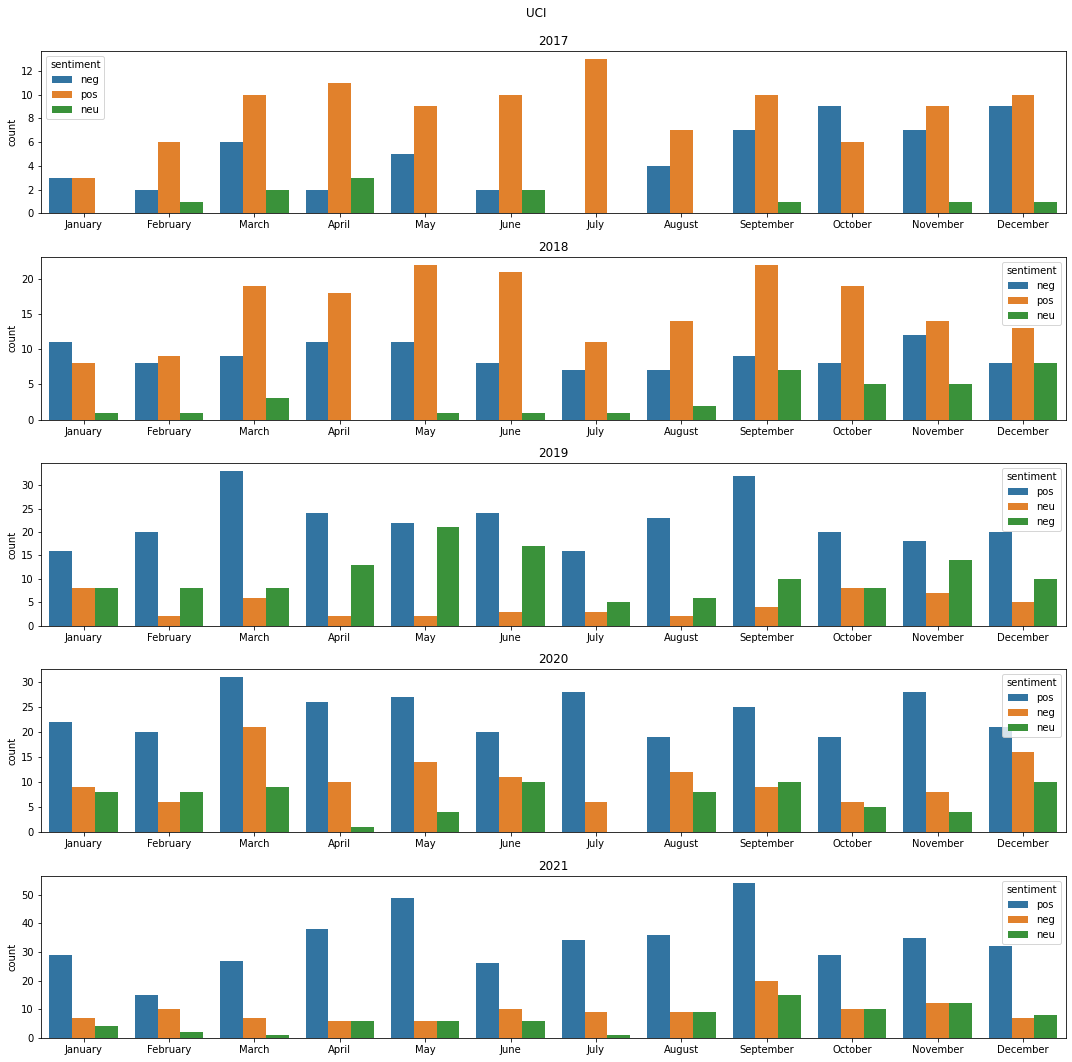

In [9]:
countplot_per_year_per_uni('UCI', uci)
countplot_per_month_per_year_per_uni('UCI', uci)

## $$UCLA$$

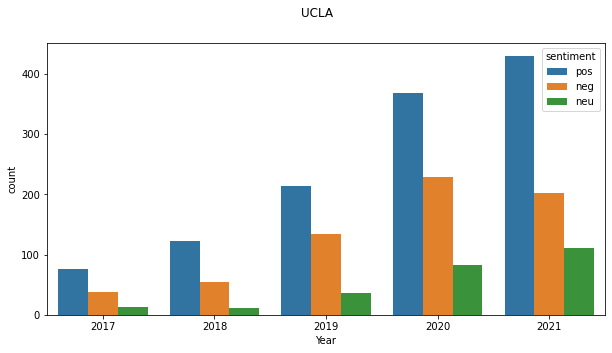

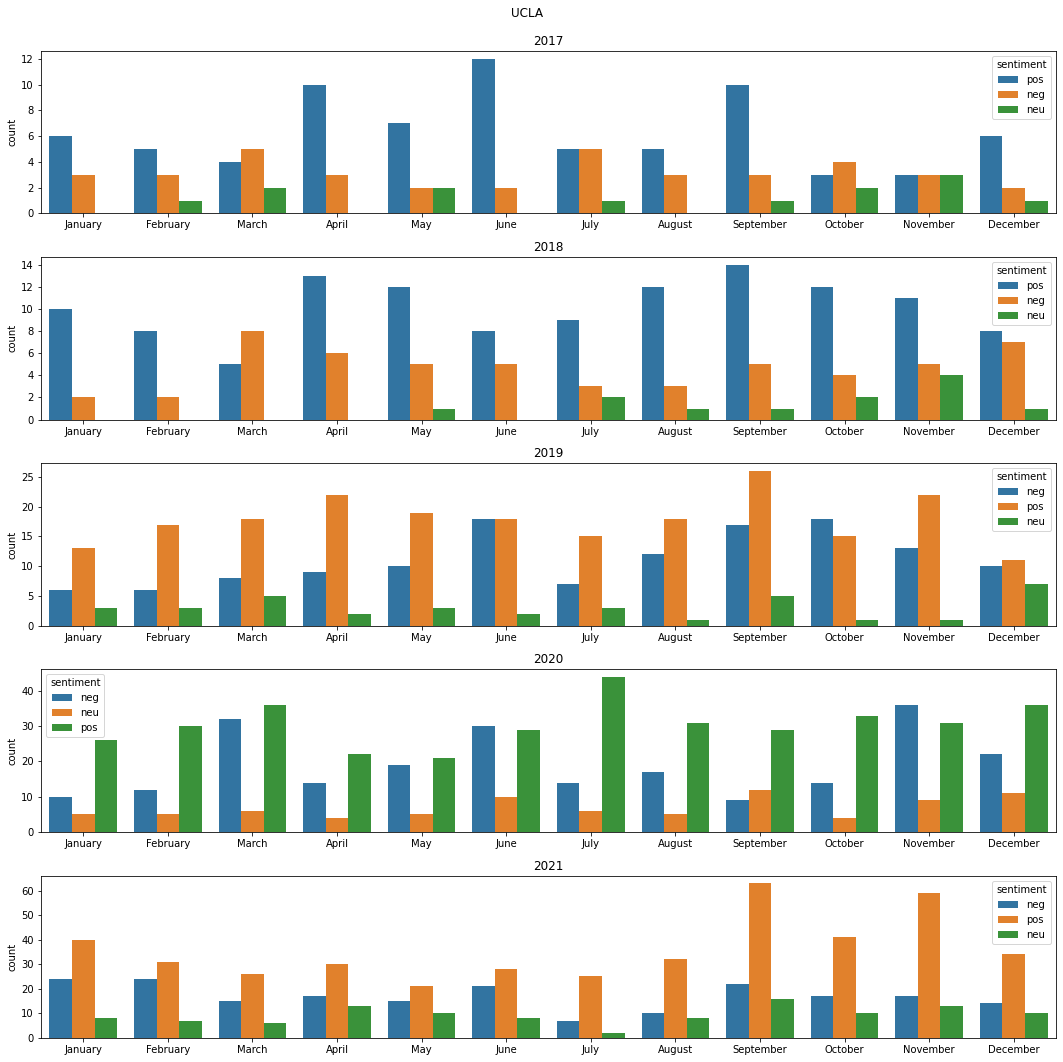

In [10]:
countplot_per_year_per_uni('UCLA', ucla)
countplot_per_month_per_year_per_uni('UCLA', ucla)


## $$UCSANTABARBARA$$

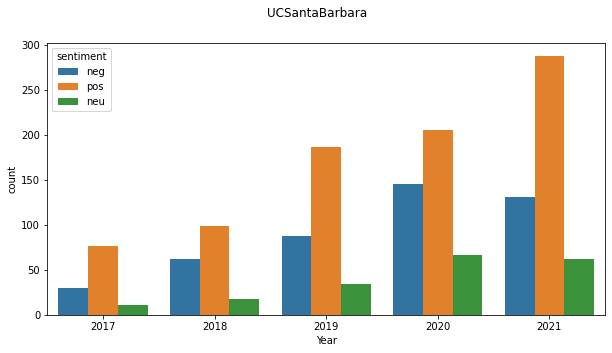

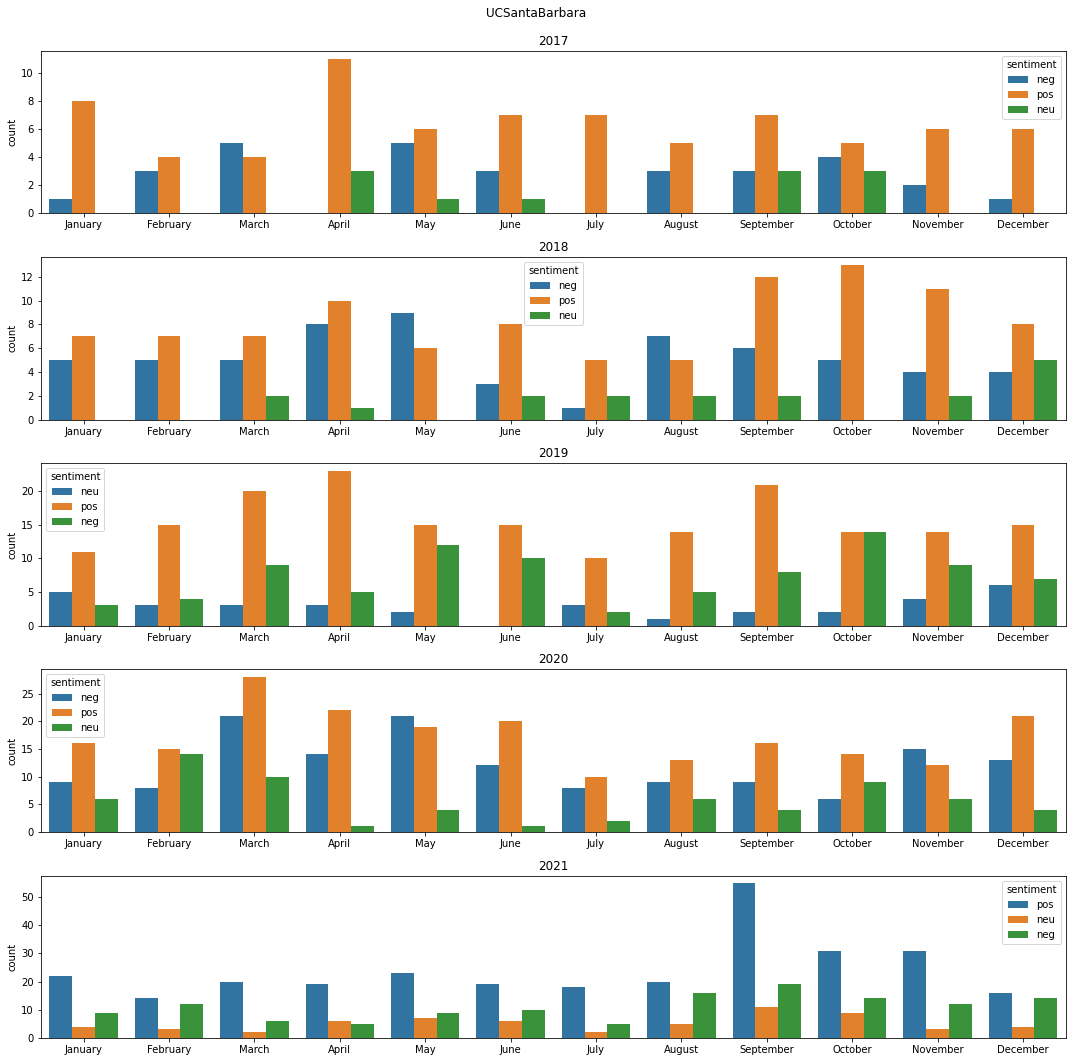

In [11]:
countplot_per_year_per_uni('UCSantaBarbara', ucsantabarbara)
countplot_per_month_per_year_per_uni('UCSantaBarbara', ucsantabarbara)


## $$UCSC$$

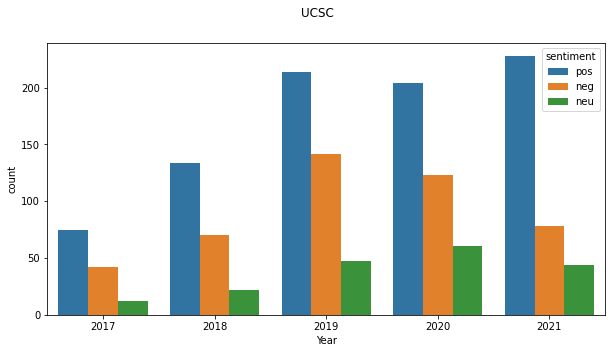

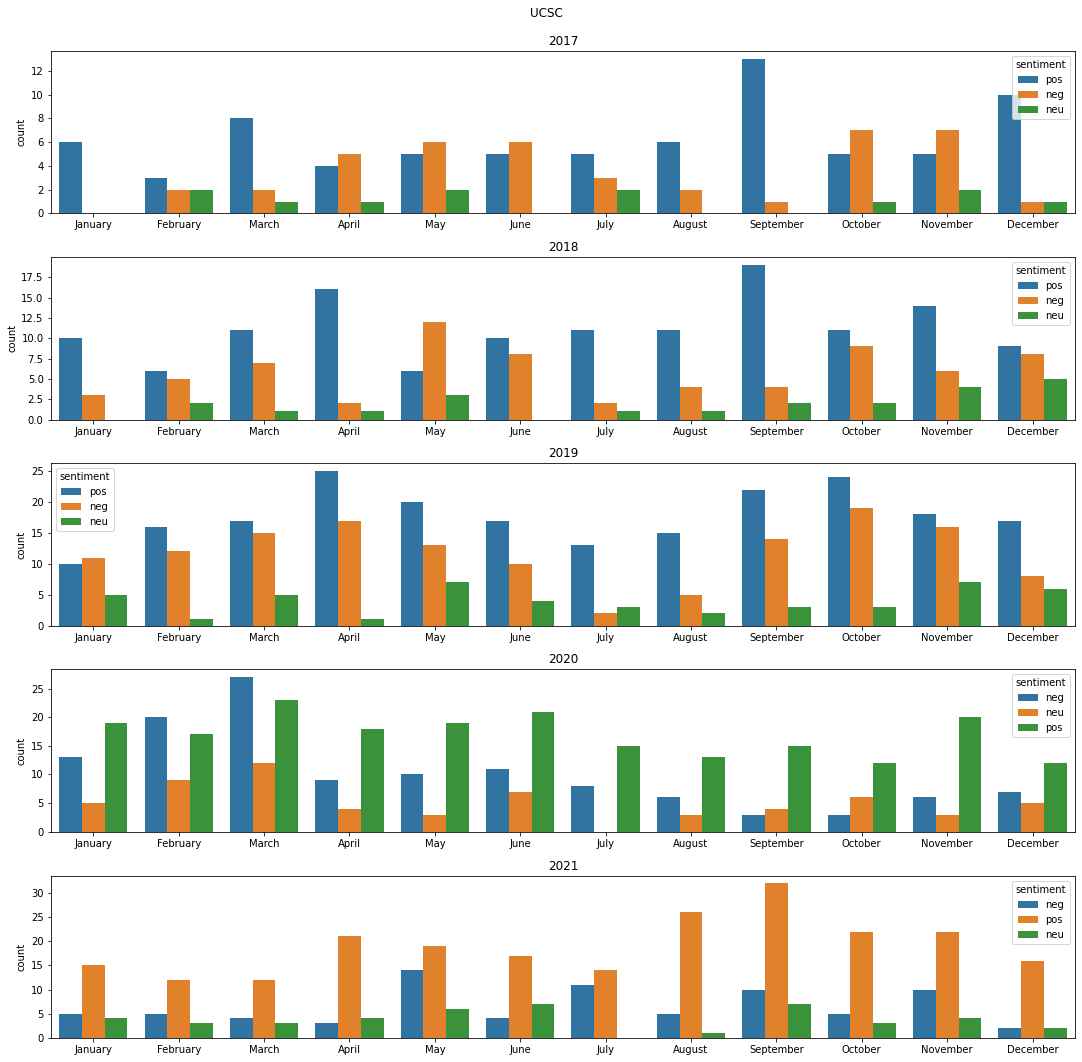

In [12]:
countplot_per_year_per_uni('UCSC', ucsc)
countplot_per_month_per_year_per_uni('UCSC', ucsc)


## $$UCSD$$

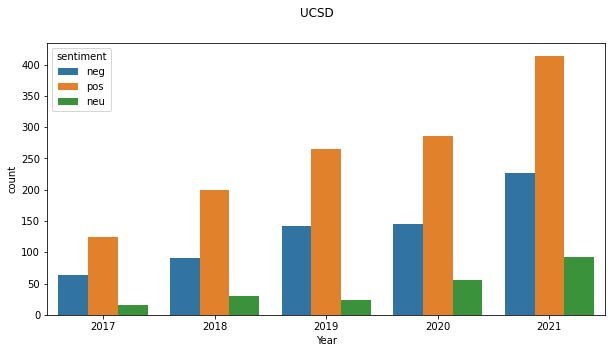

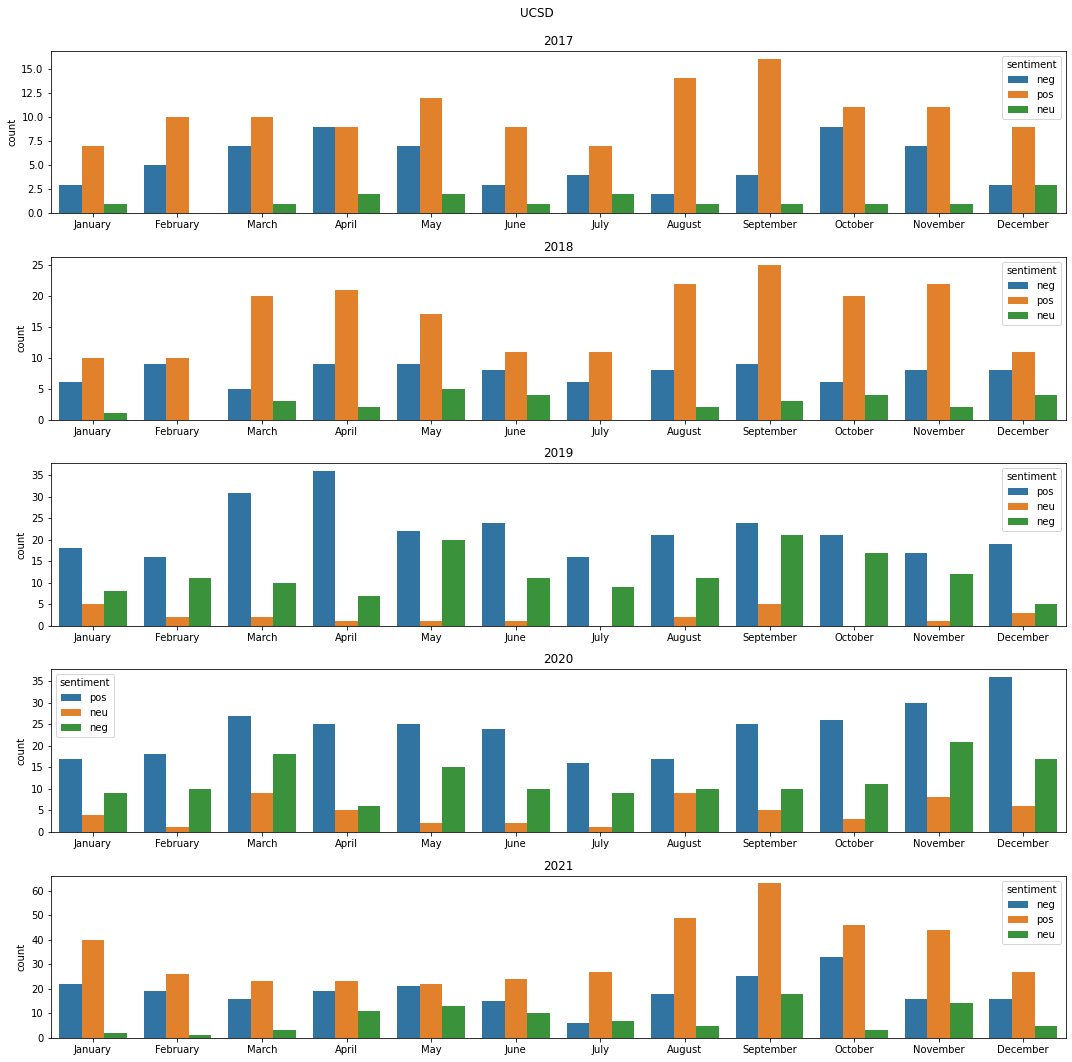

In [13]:
countplot_per_year_per_uni('UCSD', ucsd)
countplot_per_month_per_year_per_uni('UCSD', ucsd)


## $$UDUB$$

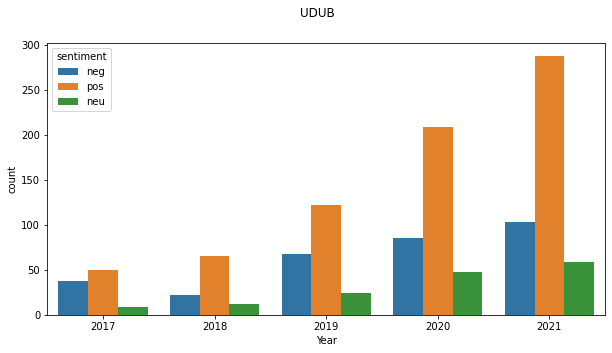

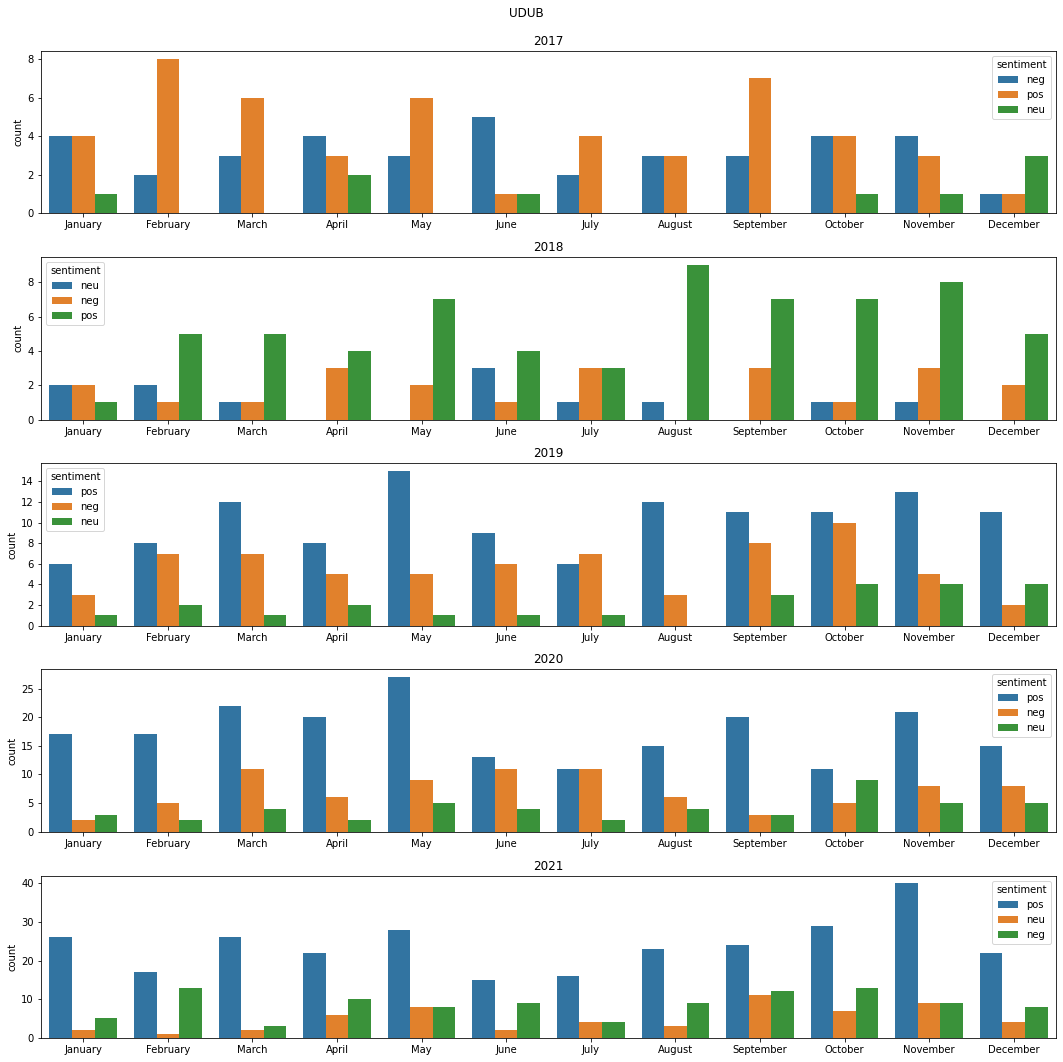

In [14]:
countplot_per_year_per_uni('UDUB', udub)
countplot_per_month_per_year_per_uni('UDUB', udub)


## $$UOFM$$

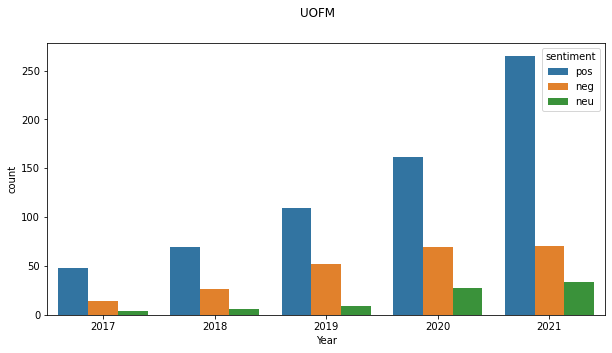

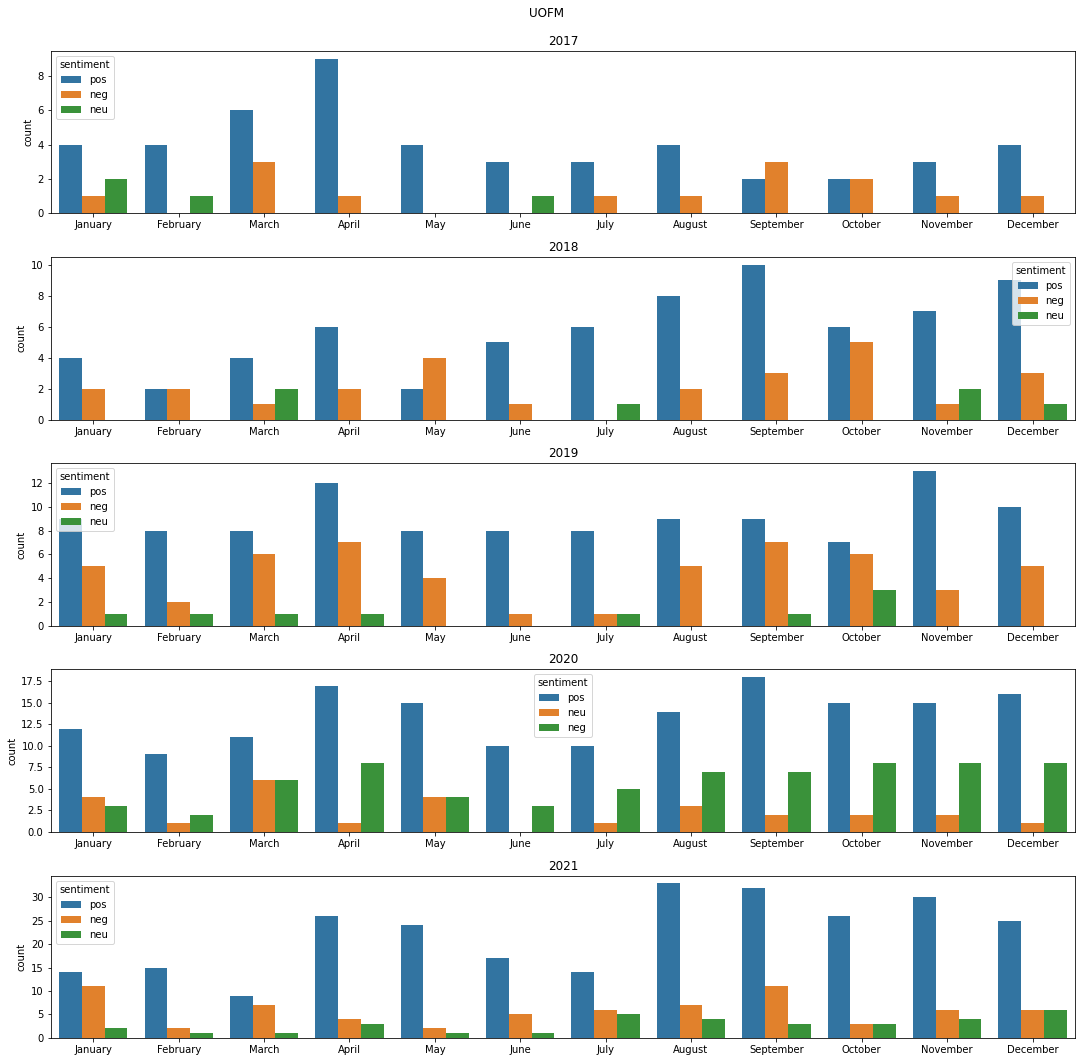

In [15]:
countplot_per_year_per_uni('UOFM', uofm)
countplot_per_month_per_year_per_uni('UOFM', uofm)

## $$UTAUSTIN$$

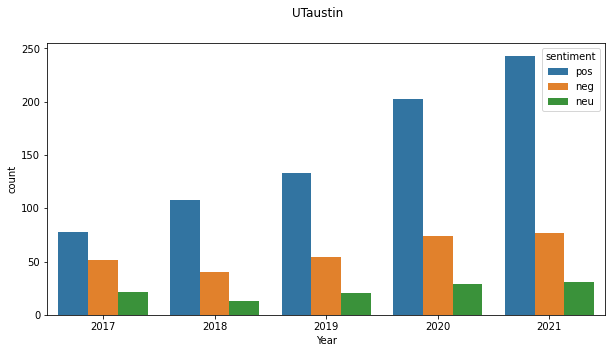

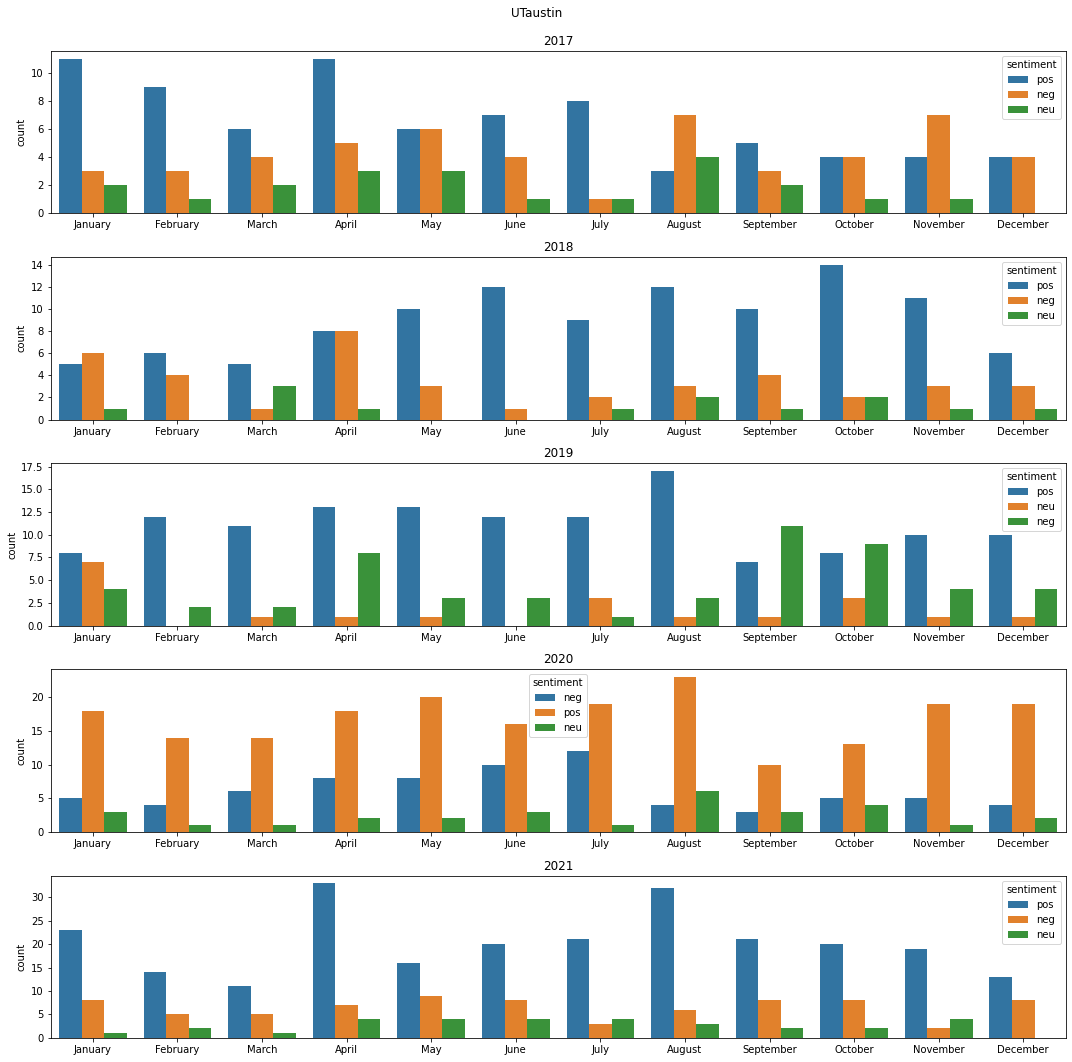

In [16]:
countplot_per_year_per_uni('UTaustin', utaustin)
countplot_per_month_per_year_per_uni('UTaustin', utaustin)